In [1]:
import tensorflow as tf
import networkx as nx
import numpy as np

import data.input_samples as inpu
import models.graph_nn as grap
import util.plotting as plut
import data.input_samples as inpu

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
# data
X, A_tilde, y, train_mask, valid_mask = inpu.make_karate_data_classifier()
nodes_n = len(y)

In [6]:
gnn = grap.GraphClassifierKarate(nodes_n=nodes_n, feat_sz=nodes_n, activation=tf.nn.tanh)
z, probs = gnn((X, A_tilde))

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input_features (InputLa [(None, 34, 34)]     0                                            
__________________________________________________________________________________________________
encoder_input_adjacency (InputL [(None, 34, 34)]     0                                            
__________________________________________________________________________________________________
graph_convolution (GraphConvolu (None, 34, 4)        136         encoder_input_features[0][0]     
                                                                 encoder_input_adjacency[0][0]    
__________________________________________________________________________________________________
graph_convolution_1 (GraphConvo (None, 34, 4)        16          graph_convolution[0][0

In [8]:
z.shape

TensorShape([34, 2])

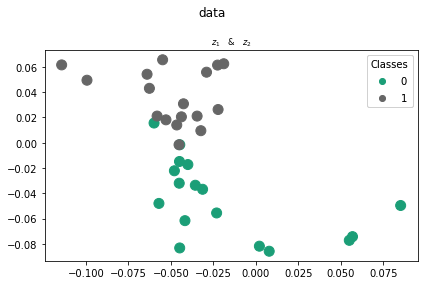

In [9]:
plut.plot_clusters(z, y)

## train network

In [13]:
gnn = grap.GraphAutoencoderKarate(nodes_n=nodes_n, feat_sz=nodes_n, activation=tf.nn.tanh)

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input_features (InputLa [(None, 34, 34)]     0                                            
__________________________________________________________________________________________________
encoder_input_adjacency (InputL [(None, 34, 34)]     0                                            
__________________________________________________________________________________________________
graph_convolution_6 (GraphConvo (None, 34, 4)        136         encoder_input_features[0][0]     
                                                                 encoder_input_adjacency[0][0]    
__________________________________________________________________________________________________
graph_convolution_7 (GraphConvo (None, 34, 4)        16          graph_convolution_6[0]

In [14]:
gnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), run_eagerly=True)

In [15]:
callbacks = [tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5, verbose=1)]
gnn.fit((X[np.newaxis,:,:], A_tilde[np.newaxis,:,:], train_mask[np.newaxis,:]), y[np.newaxis,:], epochs=200, validation_data=((X[np.newaxis,:,:], A_tilde[np.newaxis,:,:], valid_mask[np.newaxis,:]), y[np.newaxis,:]), callbacks=callbacks)

Epoch 1/200
1/1 [==============================] - 0s 160ms/step - val_loss: 0.7361
Epoch 2/200
1/1 [==============================] - 0s 25ms/step - val_loss: 0.7210
Epoch 3/200
1/1 [==============================] - 0s 23ms/step - val_loss: 0.7061
Epoch 4/200
1/1 [==============================] - 0s 28ms/step - val_loss: 0.6913
Epoch 5/200
1/1 [==============================] - 0s 23ms/step - val_loss: 0.6765
Epoch 6/200
1/1 [==============================] - 0s 27ms/step - val_loss: 0.6619
Epoch 7/200
1/1 [==============================] - 0s 33ms/step - val_loss: 0.6475
Epoch 8/200
1/1 [==============================] - 0s 23ms/step - val_loss: 0.6331
Epoch 9/200
1/1 [==============================] - 0s 30ms/step - val_loss: 0.6186
Epoch 10/200
1/1 [==============================] - 0s 22ms/step - val_loss: 0.6041
Epoch 11/200
1/1 [==============================] - 0s 31ms/step - val_loss: 0.5894
Epoch 12/200
1/1 [==============================] - 0s 26ms/step - val_loss: 0.5745


1/1 [==============================] - 0s 30ms/step - val_loss: 0.1695
Epoch 99/200
1/1 [==============================] - 0s 25ms/step - val_loss: 0.1693
Epoch 100/200
1/1 [==============================] - 0s 23ms/step - val_loss: 0.1691
Epoch 101/200
1/1 [==============================] - 0s 29ms/step - val_loss: 0.1689
Epoch 102/200
1/1 [==============================] - 0s 26ms/step - val_loss: 0.1687
Epoch 103/200
1/1 [==============================] - 0s 33ms/step - val_loss: 0.1685
Epoch 104/200
1/1 [==============================] - 0s 31ms/step - val_loss: 0.1683
Epoch 105/200
1/1 [==============================] - 0s 31ms/step - val_loss: 0.1682
Epoch 106/200
1/1 [==============================] - 0s 32ms/step - val_loss: 0.1680
Epoch 107/200
1/1 [==============================] - 0s 27ms/step - val_loss: 0.1678
Epoch 108/200
1/1 [==============================] - 0s 23ms/step - val_loss: 0.1676
Epoch 109/200
1/1 [==============================] - 0s 24ms/step - val_loss: 0.

1/1 [==============================] - 0s 22ms/step - val_loss: 0.1593
Epoch 195/200
1/1 [==============================] - 0s 26ms/step - val_loss: 0.1593
Epoch 196/200
1/1 [==============================] - 0s 23ms/step - val_loss: 0.1592
Epoch 197/200
1/1 [==============================] - 0s 22ms/step - val_loss: 0.1592
Epoch 198/200
1/1 [==============================] - 0s 24ms/step - val_loss: 0.1591
Epoch 199/200
1/1 [==============================] - 0s 32ms/step - val_loss: 0.1591
Epoch 200/200
1/1 [==============================] - 0s 35ms/step - val_loss: 0.1590


In [16]:
z, probs = gnn((X, A_tilde))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



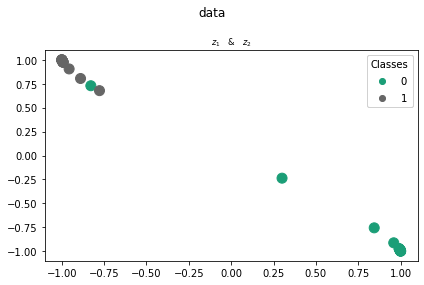

In [17]:
plut.plot_clusters(z, y)

In [18]:
z.shape

TensorShape([34, 2])